In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as stm
from os import walk

In [2]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

In [5]:
OxA00=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/Mr1mainSalmanUnary_scorestest.npy")
OxC00=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/Mr1mainSalmanCCCtest.npy")
#Dic00 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag00/FinalDict.npy").item()
with open("/home/salman/NeuroNER-master/data/Speedi/MyTrain385SeparateRepFlag00/test_spacy.txt", 'r') as file :
    TokFil00 = file.read().split('\n\n')
OxC00.shape,OxA00.shape

((30742,), (30742,))

In [6]:
OxA02=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/NAMEMr1mainSalmanUnary_scorestest.npy")
OxC02=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/NAMEMr1mainSalmanCCCtest.npy")
Dic02 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag02/NAMEFinalDict02.npy").item()
with open("/home/salman/NeuroNER-master/data/Speedi/MyTrain385SeparateRepFlag02/NAMEtest_spacy.txt", 'r') as file :
    TokFil02 = file.read().split('\n\n')
OxC02.shape,OxA02.shape

((30750,), (30750,))

In [827]:
OxA01=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/NAMEMr1mainSalmanUnary_scorestest.npy")
OxC01=np.load("NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/NAMEMr1mainSalmanCCCtest.npy")
Dic01 = np.load("/home/salman/NeuroNER-master/src/SalmanTest/MyTrain385SeparateRepFlag01/NAMEFinalDict01.npy").item()
with open("/home/salman/NeuroNER-master/data/Speedi/MyTrain385SeparateRepFlag01/NAMEtest_spacy.txt", 'r') as file :
    TokFil01 = file.read().split('\n\n')
OxC01.shape,OxA01.shape

((30734,), (30734,))

In [7]:
filenames = np.load("/home/salman/NeuroNER-master/src/SalmanTest/filenames.npy")

In [8]:
def CleanDic(Dic):
    NDic={}
    for i in filenames:
        if len(Dic[i[:-4]])>=1:
            NDic["%s"%i[:-4]] = Dic[i[:-4]]
    return(NDic)

In [828]:
#NDic00 = CleanDic(Dic00)
NDic01 = CleanDic(Dic01)
#NDic02 = CleanDic(Dic02)
#NDic11 = CleanDic(Dic11)
#NDic22 = CleanDic(Dic22)

In [36]:
DirectoryPath="/home/salman/NeuroNER-master/data/Speedi/test/MyTrain385SeparateRepFlag01/"
(_, _, RealFilesNames) = next(walk("%s"%DirectoryPath))
RealFilesNames=[i[:-4] for i in RealFilesNames]

In [13]:
def findBreaks(oxc,limit=300):
    breaks=[]
    for i,c in enumerate(oxc):
        if len(c)>limit:
            breaks.append(i)
    return(breaks)

In [829]:
#C00breaks = findBreaks(OxC00)
C01breaks = findBreaks(OxC01)
#C02breaks = findBreaks(OxC02)
#C11breaks = findBreaks(OxC11)
#C22breaks = findBreaks(OxC22)

In [830]:
len(C00breaks),len(C02breaks),len(C01breaks)

(406, 406, 406)

In [139]:
msk=np.array([15, 38, 61, 85])

In [793]:
oldfile = 0
file = 0
Prob00max = []
Prob00sum = []
SN=1
for file in range(len(RealFilesNames)):
    insideline = 0
    if len(NDic02[RealFilesNames[file]][insideline][SN]) != 0:
        for i in np.arange(oldfile,C00breaks[file]):
            for m,j in enumerate((TokFil00[i].split('\n'))):
                for splittt in (j.split(" ")[0].split("^")):
                    if (len(NDic02[RealFilesNames[file]][insideline][SN]) != 0 and \
                        len(NDic02[RealFilesNames[file]][insideline][SN][1]) != 0 and \
                        (NDic02[RealFilesNames[file]][insideline][SN][0]) in splittt):
                        try:
                            TEST=TokFil00[i].split('\n')[m-1].split(" ")[:2]
                        except:
                            TEST=TokFil00[i].split('\n')[m+1].split(" ")[:2]
                        Prob00max.append((((np.exp((np.max(OxA00[i][m][msk])))/(np.sum((np.exp(OxA00[i][m])))))),\
                                   i,file,insideline,j.split(" ")[:2],m,TEST))
                        Prob00sum.append((np.sum((np.exp(OxA00[i][m][msk])))/(np.sum((np.exp(OxA00[i][m]))))))
                        if insideline < len(NDic02[RealFilesNames[file]]) - 1:
                            insideline = insideline + 1
    else:
        if insideline < len(NDic02[RealFilesNames[file]]) - 1:
            insideline = insideline + 1
    oldfile = C00breaks[file] + 1

In [794]:
oldfile = 0
file = 0
Prob02max = []
Prob02sum = []
SN=1
for file in range(len(RealFilesNames)):
    insideline = 0
    if len(NDic02[RealFilesNames[file]][insideline][SN]) != 0:
        for i in np.arange(oldfile,C02breaks[file]):
            for m,j in enumerate((TokFil02[i].split('\n'))):
                for splittt in (j.split(" ")[0].split("^")):
                    if (len(NDic02[RealFilesNames[file]][insideline][SN]) != 0 and \
                        len(NDic02[RealFilesNames[file]][insideline][SN][1]) != 0 and \
                        ((NDic02[RealFilesNames[file]][insideline][SN][1]) in splittt)):
                        try:
                            TEST=TokFil02[i].split('\n')[m-1].split(" ")[:2]
                        except:
                            TEST=TokFil02[i].split('\n')[m+1].split(" ")[:2]
                        Prob02max.append((((np.exp((np.max(OxA02[i][m][msk])))/(np.sum((np.exp(OxA02[i][m])))))),\
                                   i,file,insideline,j.split(" ")[:2],m,TEST))
                        Prob02sum.append((np.sum((np.exp(OxA02[i][m][msk])))/(np.sum((np.exp(OxA02[i][m]))))))
                        if insideline < len(NDic02[RealFilesNames[file]]) - 1:
                            insideline = insideline + 1
    else:
        if insideline < len(NDic02[RealFilesNames[file]]) - 1:
            insideline = insideline + 1
    oldfile = C02breaks[file] + 1

In [871]:
oldfile = 0
file = 0
Prob01max = []
Prob01sum = []
SN=1
for file in range(len(RealFilesNames)):
    insideline = 0
    if len(NDic01[RealFilesNames[file]][insideline][SN]) != 0:
        for i in np.arange(oldfile,C01breaks[file]):
            for m,j in enumerate((TokFil01[i].split('\n'))):
                for splittt in (j.split(" ")[0].split("^")):
                    if (len(NDic01[RealFilesNames[file]][insideline][SN]) != 0 and \
                        len(NDic01[RealFilesNames[file]][insideline][SN][1]) != 0 and \
                        ((NDic01[RealFilesNames[file]][insideline][SN][1] in splittt))):
                        Prob01max.append((((np.exp((np.max(OxA01[i][m][msk])))/(np.sum((np.exp(OxA01[i][m])))))),\
                                   i,file,insideline,j.split(" ")[:2],m,TEST))
                        Prob01sum.append((np.sum((np.exp(OxA01[i][m][msk])))/(np.sum((np.exp(OxA01[i][m]))))))
                        if insideline < len(NDic01[RealFilesNames[file]]) - 1:
                            insideline = insideline + 1
    else:
        if insideline < len(NDic01[RealFilesNames[file]]) - 1:
            insideline = insideline + 1
    oldfile = C01breaks[file] + 1

In [856]:
NDic01["227-01"][0][SN][1]

'XAYARATH'

In [857]:
TokFil01[1481].split('\n')

['08 228-01 107 109 O',
 'Pinehaven 228-01 110 119 O',
 'Dr. 228-01 120 123 O',
 'Schuyler 228-01 124 132 O',
 ', 228-01 132 133 O',
 'FL 228-01 134 136 O',
 '76969 228-01 138 143 O',
 'RE 228-01 148 150 O',
 ': 228-01 150 151 O',
 'Wonda 228-01 153 158 O',
 'Ickes 228-01 159 164 O']

In [872]:
len(Prob00sum),len(Prob02sum),len(Prob01sum)

(740, 740, 662)

In [863]:
Dic01["227-03"]

[[['William', 'William'], ['Le', 'Amelia^01/10/59^Krieger']],
 [['William', 'William'], ['Le', 'Rhodes']]]

In [858]:
Prob01max[29]

(0.9978329, 1365, 17, 0, ['XAYARATH', '227-01'], 8, [':', '227-01'])

In [862]:
Prob00max[30]

(0.9992436, 1455, 18, 0, ['Le', '227-03'], 6, ['William', '227-03'])

In [768]:
len(NDic02[RealFilesNames[file]][insideline][SN][1])

6

In [766]:
Dic02["308-01"]

[[['', ''], ['Mills', 'Fatora']],
 [['', ''], ['Urquiza', 'Raff']],
 [['', ''], ['Mills', 'Esponda']],
 [['', ''], ['Mills', 'Dredge']]]

In [765]:
Prob02max

[(0.9877351, 3, 0, 0, ['Brockie', '221-01'], 0, [':', '221-01']),
 (0.9586197, 262, 3, 0, ['BRYANS', '222-01'], 12, ['VISIT', '222-01']),
 (0.9880858, 311, 4, 0, ['COLATO', '222-03'], 12, ['VISIT', '222-03']),
 (0.885781, 354, 5, 0, ['ALBER', '222-04'], 9, ['BRADY', '222-04']),
 (0.8649786, 355, 5, 1, ['Bennetts', '222-04'], 17, ['Brady', '222-04']),
 (0.009885628, 368, 5, 2, ['LATINO', '222-04'], 8, ['BRADY', '222-04']),
 (0.8419053, 391, 6, 0, ['Sayegh', '222-05'], 13, ['Brady', '222-05']),
 (0.7389037, 392, 6, 1, ['Bachmeyer', '222-05'], 3, ['Brady', '222-05']),
 (0.5803901, 415, 6, 2, ['Tamer', '222-05'], 3, ['Brady', '222-05']),
 (0.52643555, 423, 6, 3, ['Dulberg', '222-05'], 2, ['Brady', '222-05']),
 (0.9784088, 438, 7, 0, ['Ehrke', '223-01'], 9, [':', '223-01']),
 (0.91328657, 438, 7, 1, ['Morishito', '223-01'], 33, ['Imogene', '223-01']),
 (0.9975124, 439, 7, 2, ['Defosses', '223-01'], 5, ['Ms.', '223-01']),
 (0.9960036, 451, 7, 3, ['Powis', '223-01'], 5, [':', '223-01']),
 (0.

In [835]:
TEST=0
for i in RealFilesNames:
    for j in NDic02[i]:
        if len(j[SN])!=0:
            TEST=TEST+1

In [836]:
TEST

879

In [366]:
NDic02["221-03"]:
    

[[['Ted', ''], ['', '']], [['Ted', ''], ['', '']], [['Ted', ''], ['', '']]]

In [796]:
len(Prob00sum),len(Prob02sum)

(747, 740)

In [838]:
for i in np.arange(730):
    if Prob00max[i][4][1]!=Prob02max[i][4][1]:
        print(i)
        break

In [798]:
# This was done because of Dr. name(first entry) and Patient name where the same and made the confussion.
del Prob00max[313]
del Prob00sum[313]

In [799]:
len(Prob00sum),len(Prob02sum)

(746, 740)

In [800]:
for i in np.arange(730):
    if Prob00max[i][4][1]!=Prob02max[i][4][1]:
        print(i)
        break

355


In [801]:
# This is because of the wrong labeling of data!
del Prob00max[355]
del Prob00sum[355]
del Prob00max[354]
del Prob00sum[354]
del Prob00max[353]
del Prob00sum[353]

In [802]:
len(Prob00sum),len(Prob02sum)

(743, 740)

In [803]:
for i in np.arange(730):
    if Prob00max[i][4][1]!=Prob02max[i][4][1]:
        print(i)
        break

389


In [804]:
# This was done because of Dr. name and Patient name where the same and made the confussion.
del Prob00max[389]
del Prob00sum[389]

In [805]:
len(Prob00sum),len(Prob02sum)

(742, 740)

In [806]:
for i in np.arange(730):
    if Prob00max[i][4][1]!=Prob02max[i][4][1]:
        print(i)
        break

465


In [807]:
# This was done because of Dr. name and Patient name where the same and made the confussion.
del Prob00max[466]
del Prob00sum[466]
del Prob00max[465]
del Prob00sum[465]

In [808]:
len(Prob00sum),len(Prob02sum)

(740, 740)

In [809]:
for i in np.arange(730):
    if Prob00max[i][4][1]!=Prob02max[i][4][1]:
        print(i)
        break

In [874]:
TotProbMax00 = [i[0] for i in Prob00max]
TotProbMax01 = [i[0] for i in Prob01max]
TotProbMax02 = [i[0] for i in Prob02max]


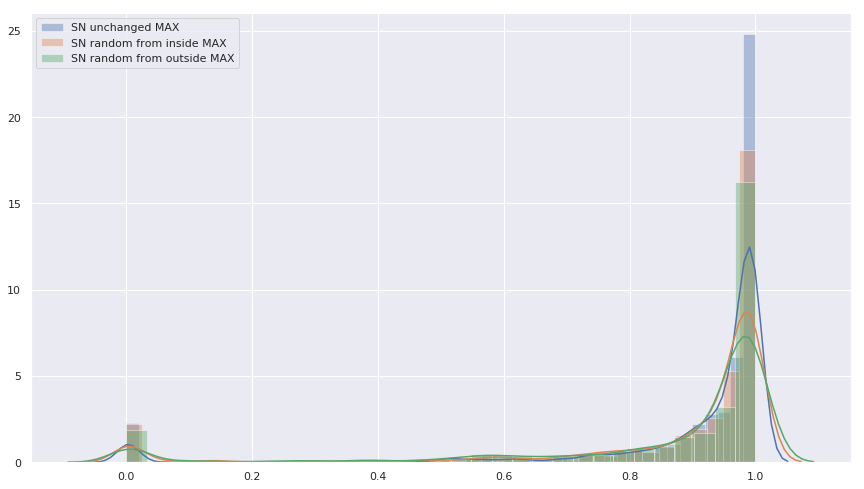

In [883]:
sns.set_style('darkgrid')
sns.distplot(TotProbMax00,label="SN unchanged MAX",norm_hist=True)#,bins=100)
sns.distplot(TotProbMax01,label="SN random from inside MAX",norm_hist=True)#,bins=100)
sns.distplot(TotProbMax02,label="SN random from outside MAX",norm_hist=True)#,bins=100)
#sns.distplot(Prob00sum,label="GN & SN unchanged sum",norm_hist=True)
#sns.distplot(Prob01sum,label="SN random from inside sum",norm_hist=True)
#sns.distplot(Prob02sum,label="SN random from outside sum",norm_hist=True)
plt.legend()

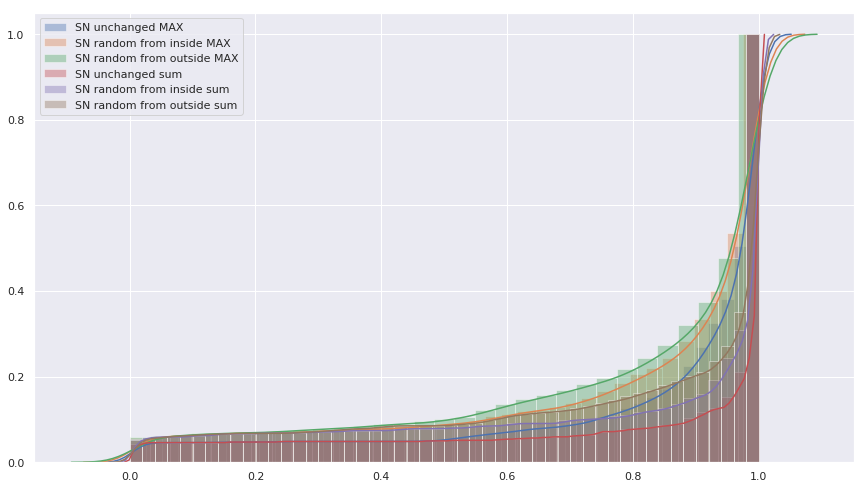

In [884]:
sns.set_style('darkgrid')
sns.distplot(np.array(TotProbMax00),label="SN unchanged MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProbMax01,label="SN random from inside MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(TotProbMax02,label="SN random from outside MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(Prob00sum,label="SN unchanged sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(Prob01sum,label="SN random from inside sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(Prob02sum,label="SN random from outside sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.legend()

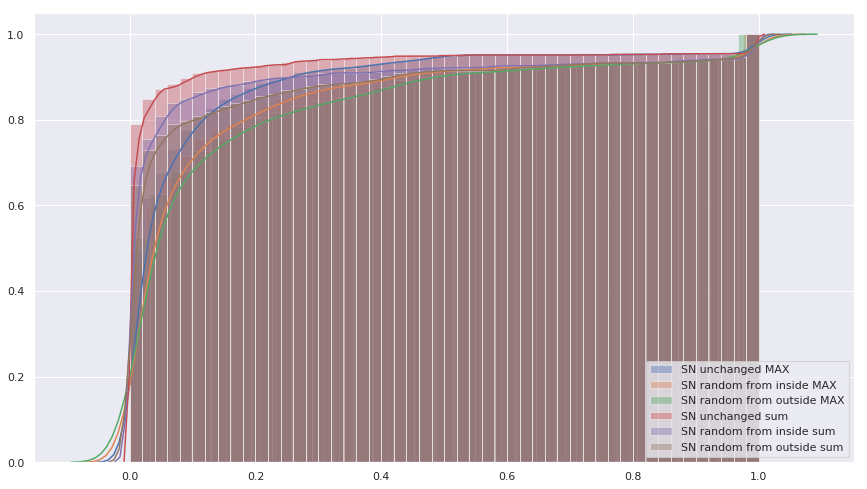

In [885]:
sns.set_style('darkgrid')
sns.distplot(1 - np.array(TotProbMax00),label="SN unchanged MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1 - np.array(TotProbMax01),label="SN random from inside MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1 - np.array(TotProbMax02),label="SN random from outside MAX",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1 - np.array(Prob00sum),label="SN unchanged sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1 - np.array(Prob01sum),label="SN random from inside sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
sns.distplot(1 - np.array(Prob02sum),label="SN random from outside sum",\
             hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.legend()

In [212]:
OxC00[3]

[69, 69, 69, 85]

In [199]:
file=2
insideline=0
GN=0
SN=1
NDic02[RealFilesNames[file]]#[insideline][SN]

[[['Ted', ''], ['', '']], [['Ted', ''], ['', '']], [['Ted', ''], ['', '']]]

In [197]:
for i in np.arange(C00breaks[file-1]+1,C00breaks[file]):
    for m,j in enumerate((TokFil00[i].split('\n'))):
        if (j.split(" ")[0] == NDic02[RealFilesNames[file]][insideline][SN][0]):
            print((np.sum((np.exp(OxA00[i][m][msk]))/(np.sum((np.exp(OxA00[i][m])))))))
            if insideline < len(NDic02[RealFilesNames[file]]) - 1:
                insideline = insideline + 1

0.965844
0.99738544


In [196]:
for n,i in enumerate(np.arange(C00breaks[file-1]+1,C00breaks[file])):
    for m,j in enumerate((TokFil00[i].split('\n'))):
        if (j.split(" ")[0] == NDic02[RealFilesNames[file]][insideline][SN][0]):
            print((np.exp(np.max(OxA00[i][m][msk])))/(np.sum((np.exp(OxA00[i][m])))))
            if insideline < len(NDic02[RealFilesNames[file]]) - 1:
                insideline = insideline + 1

0.94309056
0.9879421


In [191]:
for n,i in enumerate(np.arange(C00breaks[file-1]+1,C00breaks[file])):
    for m,j in enumerate((TokFil00[i].split('\n'))):
        if (j.split(" ")[0] == NDic02[RealFilesNames[file]][insideline][SN][0]):
            print((np.exp(np.max(OxA00[i][m][msk])))/(np.sum((np.exp(OxA00[i][m])))))

0.94309056
0.9879421
